In [1]:
#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.ensemble import AdaBoostClassifier
#from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score


#Standard libraries for data visualization---------------------

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------

import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

#pipe line
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')
import pickle



In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data = data

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Figure size 640x480 with 0 Axes>

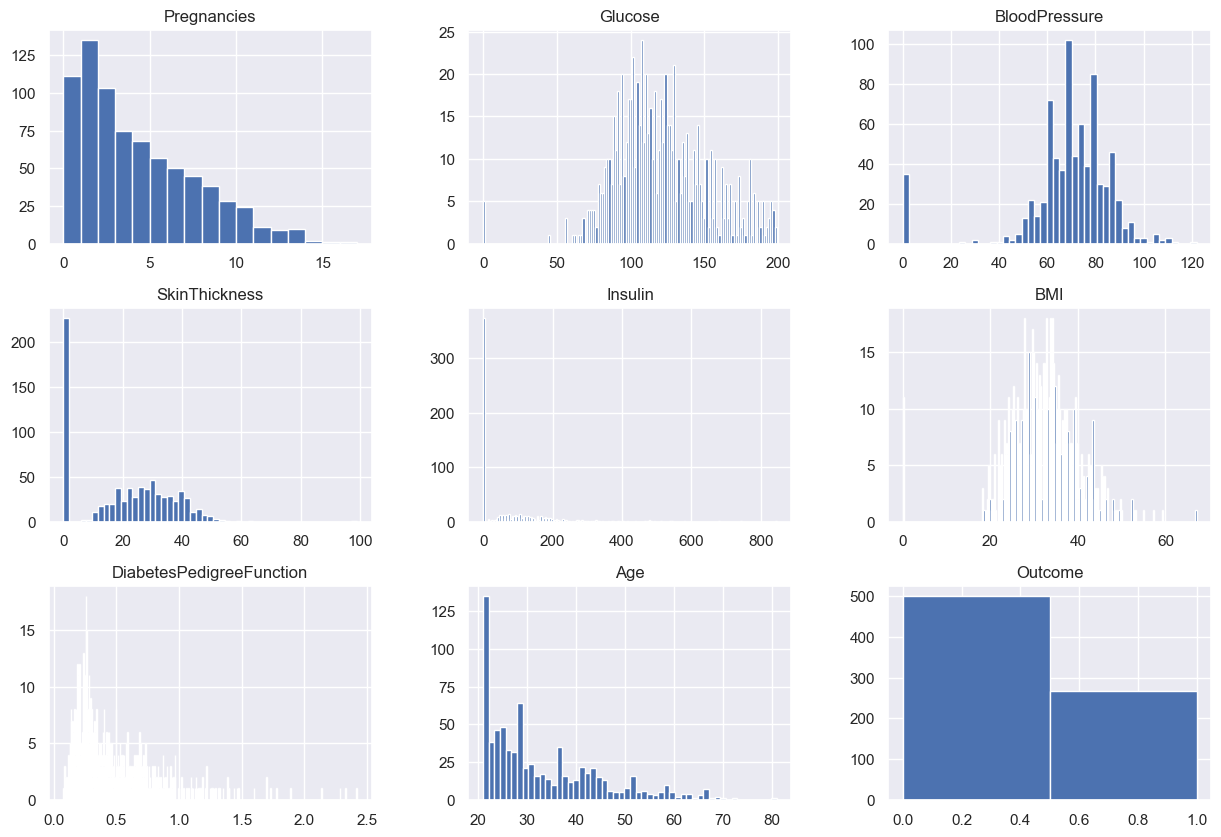

In [7]:
sns.set()
plt.suptitle('Histogram data')

fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Mengatur ukuran keseluruhan subplot
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Menambahkan jarak horizontal dan vertikal antara subplot

for i, ax in enumerate(axes.flat):
    if i < data.shape[1]:
        ax.set_title(data.columns.values[i])
        bin = np.size(data.iloc[:, i].unique())
        ax.hist(data.iloc[:, i], bins=bin)
    else:
        ax.axis('off')  # Menghilangkan subplot yang tidak digunakan

plt.show()



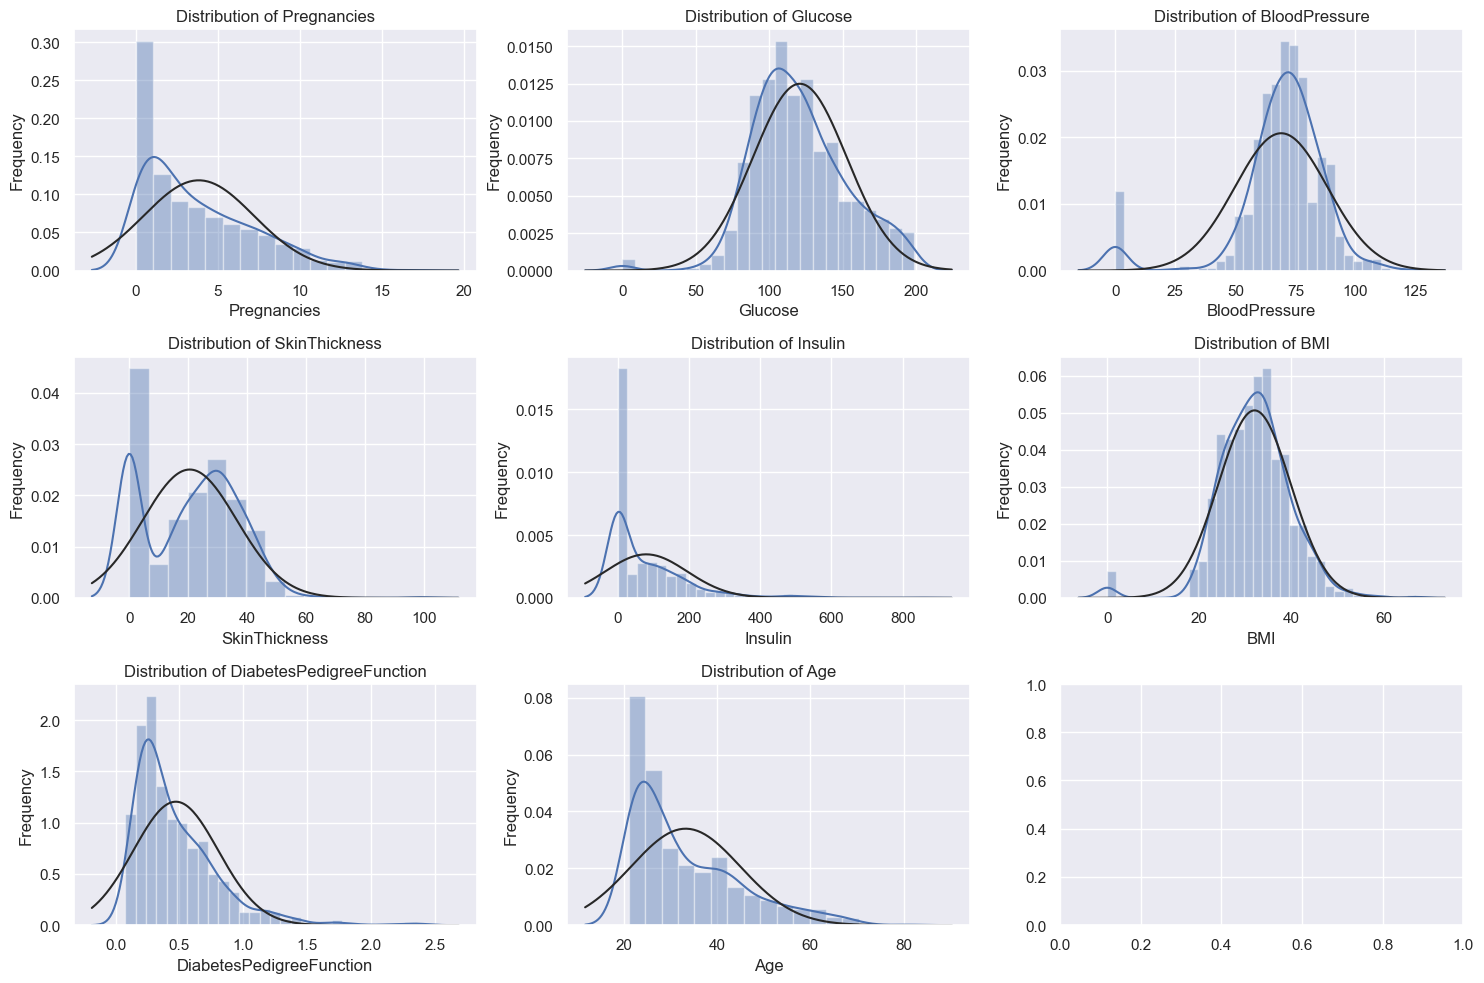

In [8]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)  


for i, col in enumerate(columns):
    ax = axes.flat[i]
    
    sns.distplot(data[col], fit=norm, ax=ax)
    
    
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    
    
    if 'fit' in locals() and fit == 'norm':
        mu, std = norm.fit(data[col])
        xmin, xmax = ax.get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        ax.plot(x, p, 'k', linewidth=2, label='Normal Fit')
    

plt.tight_layout()
plt.show()



In [9]:
total_out = data['Outcome'].value_counts().reset_index()
total_out['Outcome'] = total_out['Outcome'].replace(0,'Healthy')
total_out['Outcome'] = total_out['Outcome'].replace(1,'Diabetes')
total_out

,Outcome,count
0,Healthy,500
1,Diabetes,268


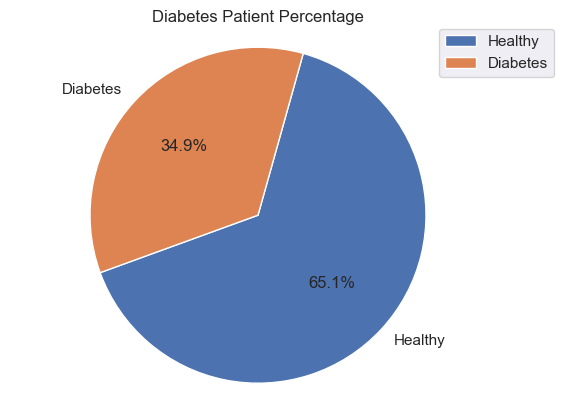

In [10]:
label = total_out['Outcome']
count = total_out['count']

plt.pie(count, labels=label, autopct='%1.1f%%', startangle=200)
plt.title('Diabetes Patient Percentage')
plt.legend(bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.axis('equal')
plt.show()

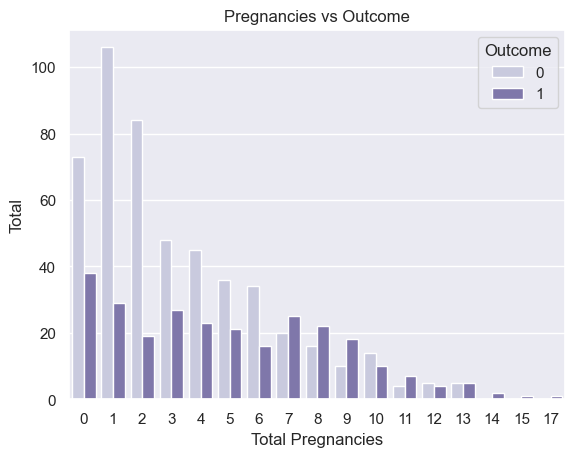

In [11]:
sns.countplot(x ='Pregnancies', hue = "Outcome", data = data, palette = "Purples")
plt.title('Pregnancies vs Outcome')
plt.xlabel('Total Pregnancies')
plt.ylabel('Total')
plt.show()

In [12]:
def categorize_age(age):
    if 20 <= age < 30:
        return '20-29'
    elif 30 <= age < 40:
        return '30-39'
    elif 40 <= age < 50:
        return '40-49'
    else:
        return '50+'
    
data['Age_Cat'] = data['Age'].apply(categorize_age)

In [13]:
age_sort = data.sort_values(by='Age_Cat')

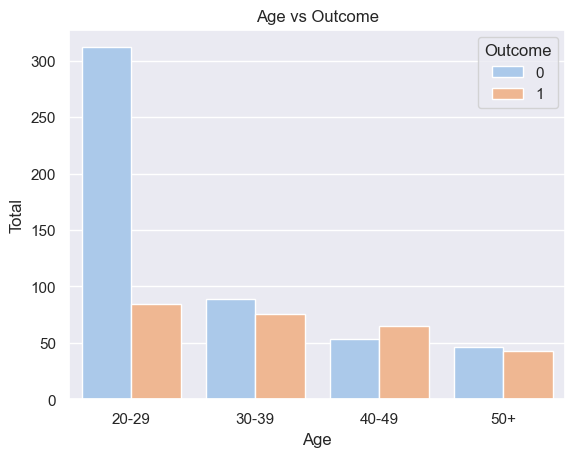

In [14]:
sns.countplot(x ='Age_Cat', hue = "Outcome", data = age_sort, palette = "pastel")
plt.title('Age vs Outcome')
plt.xlabel('Age')
plt.ylabel('Total')
plt.show()

In [15]:
data = data.drop(columns = ['Age_Cat'])

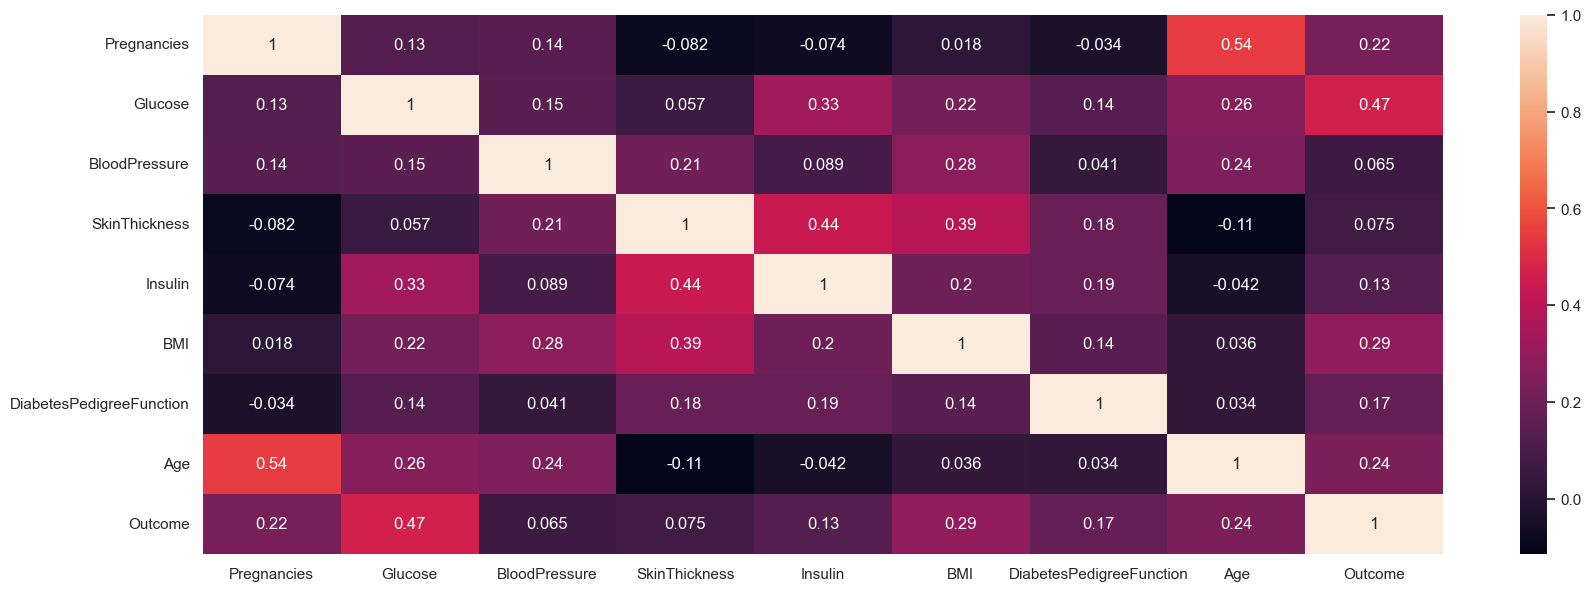

In [16]:
corr_matrix = data.corr()

# Plotting the heatmap of corr
fig20, ax20 = plt.subplots(figsize=(20, 7))
dataplot = sns.heatmap(data=corr_matrix, annot=True, ax=ax20)
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'BMI'),
  Text(4, 0, 'DiabetesPedigreeFunction'),
  Text(5, 0, 'Age')])

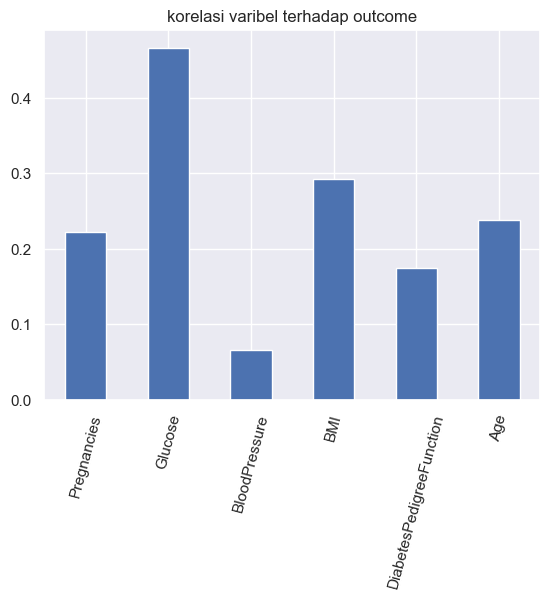

In [39]:
corelation = data.drop(columns = ['Outcome'], inplace=False).corrwith(data.Outcome)
corelation.plot.bar(title = 'korelasi varibel terhadap outcome')
plt.xticks (rotation=75)

In [18]:
data.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [19]:
data = data.drop(columns = ['Insulin'])

In [20]:
data = data.drop(columns = ['SkinThickness'])

In [21]:
data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


In [22]:
y = data["Outcome"]
X = data.drop(columns=['Outcome'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size = 0.2, #use 0.1 if data is huge.
                                                    random_state = 0)

#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (614, 6)
Number transactions y_train dataset:  (614,)
Number transactions X_test dataset:  (154, 6)
Number transactions y_test dataset:  (154,)


In [24]:
sc_X = RobustScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [25]:
scaler_filename = 'fitted_scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(sc_X, file)

In [26]:
def evaluate_classifier(classifier, X_train, y_train, X_test, y_test, model_name, results):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2.0)
    roc_auc = roc_auc_score(y_test, y_pred)
   
    model_results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2, roc_auc]],
                                 columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])
    
    results = pd.concat([results, model_results], ignore_index=True)
    
    return results

In [27]:
random_state=42
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

classifiers = {
    'Decision Tree': DecisionTreeClassifier(criterion = 'entropy', random_state = random_state),
    'Random Forest': RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = random_state),
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state = random_state,class_weight='balanced'),
    'Gaussian NB' : GaussianNB(),
    'SVC' : SVC(kernel = 'linear', random_state = random_state),
    'KNN' : KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    'Kernel SVM' : SVC(kernel = 'rbf', random_state = random_state)
}

for model_name, classifier in classifiers.items():
    results = evaluate_classifier(classifier, X_train, y_train, X_test, y_test, model_name, results)
    
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)

In [28]:
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score  \
1        Random Forest  0.837662   0.822222  0.685185  0.747475  0.708812   
3          Gaussian NB  0.785714   0.756098  0.574074  0.652632  0.603113   
4                  SVC  0.779221   0.738095  0.574074  0.645833  0.600775   
6           Kernel SVM  0.785714   0.733333  0.611111  0.666667  0.632184   
5                  KNN  0.779221   0.717391  0.611111  0.660000  0.629771   
2  Logistic Regression  0.798701   0.682540  0.796296  0.735043  0.770609   
0        Decision Tree  0.668831   0.531915  0.462963  0.495050  0.475285   

    ROC-AUC  
1  0.802593  
3  0.737037  
4  0.732037  
6  0.745556  
5  0.740556  
2  0.798148  
0  0.621481  


In [29]:
classifier = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = random_state)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

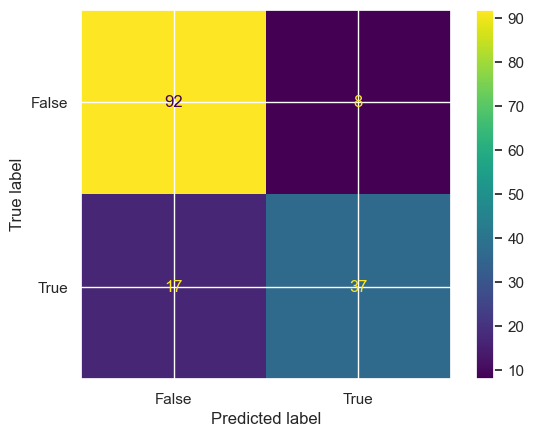

In [30]:
cm = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot() 

In [31]:
pickle.dump(classifier, open('Random_Forest_model.pkl','wb'))

In [32]:
data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


# Pengujian data baru

In [33]:
data_baru ={
    'Pregnancies' : [6,1,8],
    'Glucose' : [148,85,183],
    'BloodPressure' : [72,66,64],
    'SkinThickness' : [35,29,29],
    'Insulin' : [0,0,0],
    'BMI' : [33.6,26.6,23.3],
    'DiabetesPedigreeFunction' : [0.6,0.3,0.6],
    'Age' : [50,40,32]
}

In [34]:
baru = pd.DataFrame(data_baru)

In [35]:
baru = baru.drop(columns = ['Insulin'])
baru = baru.drop(columns = ['SkinThickness'])

In [36]:
new_data_scaled1 = sc_X.transform(baru)
new_predictions = classifier.predict(new_data_scaled1)

In [37]:
prediction_labels = ["Negative" if pred == 0 else "Positive" for pred in new_predictions]

In [38]:
print("Prediction for new data:", prediction_labels)

Prediction for new data: ['Positive', 'Negative', 'Positive']
